In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
happiness_cities = pd.read_csv("Happiness_Cities_weather_2018_clean.csv")

happiness_cities.head(100)

,Unnamed: 0,Overall Rank (1=Best),City,State,Total Score,Lat,Lng,DateUTC,Summary,Icon,Sunrise Time,Sunset Time,Cloud Cover,UV Index
0,0,168,Akron,OH,44.05,41.081445,-81.519005,1514786400,Foggy throughout the day.,fog,1514811149,1514844561,0.66,1
1,1,168,Akron,OH,44.05,41.081445,-81.519005,1514872800,Foggy throughout the day.,fog,1514897553,1514931012,0.52,2
2,2,168,Akron,OH,44.05,41.081445,-81.519005,1514959200,Foggy throughout the day.,fog,1514983955,1515017464,0.59,1
3,3,168,Akron,OH,44.05,41.081445,-81.519005,1515045600,Foggy throughout the day.,fog,1515070354,1515103918,0.92,1
4,4,168,Akron,OH,44.05,41.081445,-81.519005,1515132000,Foggy throughout the day.,fog,1515156751,1515190373,0.31,2
5,5,168,Akron,OH,44.05,41.081445,-81.519005,1515218400,Foggy throughout the day.,fog,1515243146,1515276830,0.45,2
6,6,168,Akron,OH,44.05,41.081445,-81.519005,1515304800,Foggy throughout the day.,fog,1515329539,1515363289,0.54,2
7,7,168,Akron,OH,44.05,41.081445,-81.519005,1515391200,Possible light snow in the morning and afternoon.,snow,1515415930,1515449748,0.97,1
8,8,168,Akron,OH,44.05,41.081445,-81.519005,1515477600,Foggy throughout the day.,fog,1515502318,1515536209,0.61,2
9,9,168,Akron,OH,44.05,41.081445,-81.519005,1515564000,Foggy throughout the day.,fog,1515588704,1515622671,0.63,2


In [3]:
happiness_cities.corr()**2

,Unnamed: 0,Overall Rank (1=Best),Total Score,Lat,Lng,DateUTC,Sunrise Time,Sunset Time,Cloud Cover,UV Index
Unnamed: 0,1.000000,4.798435e-04,5.528236e-05,9.400894e-03,1.311485e-02,3.725871e-06,1.939363e-06,1.972600e-06,6.601649e-04,0.000002
Overall Rank (1=Best),0.000480,1.000000e+00,9.657166e-01,1.407384e-05,1.080148e-01,1.952356e-08,1.741090e-06,1.741367e-06,5.868724e-03,0.001877
Total Score,0.000055,9.657166e-01,1.000000e+00,1.835348e-04,1.119170e-01,2.017400e-08,1.835740e-06,1.836207e-06,6.987570e-03,0.002312
Lat,0.009401,1.407384e-05,1.835348e-04,1.000000e+00,1.719241e-03,1.537014e-07,1.589707e-08,1.805369e-08,2.375105e-02,0.067008
Lng,0.013115,1.080148e-01,1.119170e-01,1.719241e-03,1.000000e+00,6.545685e-08,1.104163e-05,1.104653e-05,5.423020e-02,0.021029
DateUTC,0.000004,1.952356e-08,2.017400e-08,1.537014e-07,6.545685e-08,1.000000e+00,9.999827e-01,9.999824e-01,5.212639e-08,0.009141
Sunrise Time,0.000002,1.741090e-06,1.835740e-06,1.589707e-08,1.104163e-05,9.999827e-01,1.000000e+00,9.999995e-01,5.411436e-07,0.009267
Sunset Time,0.000002,1.741367e-06,1.836207e-06,1.805369e-08,1.104653e-05,9.999824e-01,9.999995e-01,1.000000e+00,3.911579e-07,0.009156
Cloud Cover,0.000660,5.868724e-03,6.987570e-03,2.375105e-02,5.423020e-02,5.212639e-08,5.411436e-07,3.911579e-07,1.000000e+00,0.234189
UV Index,0.000002,1.876805e-03,2.312410e-03,6.700772e-02,2.102854e-02,9.140607e-03,9.267451e-03,9.156216e-03,2.341894e-01,1.000000


In [4]:
import seaborn as sns

In [5]:
happiness_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64955 entries, 0 to 64954
Data columns (total 14 columns):
Unnamed: 0               64955 non-null int64
Overall Rank (1=Best)    64955 non-null int64
City                     64955 non-null object
State                    64955 non-null object
Total Score              64955 non-null float64
Lat                      64955 non-null float64
Lng                      64955 non-null float64
DateUTC                  64955 non-null int64
Summary                  64955 non-null object
Icon                     64955 non-null object
Sunrise Time             64955 non-null int64
Sunset Time              64955 non-null int64
Cloud Cover              64955 non-null float64
UV Index                 64955 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 6.9+ MB


In [8]:
cc = happiness_cities[["City", "Cloud Cover"]].groupby("City")
cc_count = cc.count() 
cc_count[cc_count["Cloud Cover"] != 365]

,Cloud Cover
City,
Aurora,730
Casper,352
Charleston,730
Columbia,730
Columbus,730
Glendale,730
Las Cruces,363
Portland,730


In [10]:
UV = happiness_cities[["UV Index", "City", "Overall Rank (1=Best)"]].groupby("Overall Rank (1=Best)")


In [16]:
UV_mean=UV.mean()


In [17]:
UV_mean = UV_mean.reset_index()

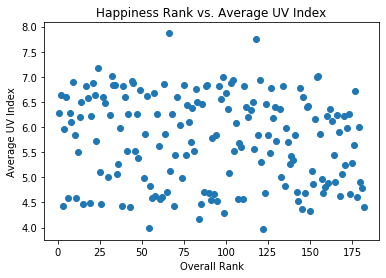

In [29]:
plt.scatter(UV_mean["Overall Rank (1=Best)"], UV_mean["UV Index"])
plt.xlabel("Overall Rank")
plt.ylabel("Average UV Index")
plt.title("Happiness Rank vs. Average UV Index")
plt.savefig("Rank vs. Avg UV Index.png")

In [19]:
UV2 = happiness_cities[["UV Index", "Overall Rank (1=Best)"]].groupby("Overall Rank (1=Best)")
UV2_sum = UV2.sum()

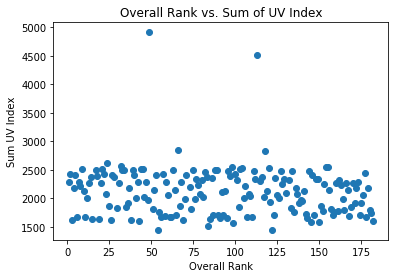

In [28]:
plt.scatter(UV2_sum.index, UV2_sum["UV Index"])
plt.xlabel("Overall Rank")
plt.ylabel("Sum UV Index")
plt.title("Happiness Rank vs. Sum of UV Index")
plt.savefig("Rank vs. sum of UV Index.png")

In [21]:
sun = happiness_cities[["Icon", "City", "Overall Rank (1=Best)"]]
sun.head()

,Icon,City,Overall Rank (1=Best)
0,fog,Akron,168
1,fog,Akron,168
2,fog,Akron,168
3,fog,Akron,168
4,fog,Akron,168


In [22]:
clear_day = sun[sun["Icon"] == 'clear-day']
clear_day.head()

,Icon,City,Overall Rank (1=Best)
76,clear-day,Akron,168
84,clear-day,Akron,168
281,clear-day,Akron,168
342,clear-day,Akron,168
378,clear-day,Albuquerque,132


In [23]:
count_clear_day = clear_day[["Icon", "Overall Rank (1=Best)"]].groupby("Overall Rank (1=Best)").count()
count_clear_day

,Icon
Overall Rank (1=Best),
1,128
2,127
3,41
4,96
5,128
6,117
7,127
8,100
9,184


Text(0, 0.5, 'Count Clear Days')

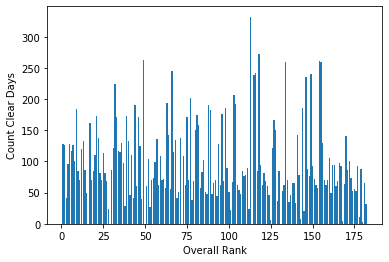

In [25]:
plt.bar(count_clear_day.index, count_clear_day["Icon"])
plt.xlabel("Overall Rank")
plt.ylabel("Count Clear Days")

In [ ]:
plt.bar()